## HCP Behavial Data 

In this XP I'll will explore HCP data from different domaine  :
- Demographic
- Physiologic
- Cognitive
- Emotional/Social
- Motor
- Sensory


In [1]:
import os
import numpy as np
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [67]:
# Load pheno file
path_root = '/media/yassinebha/database29/Drive/HCP/'
data = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))

# Demographic Domain

In [68]:
behav_demog = ["Age_in_Yrs","Gender","Handedness","Zygosity","Race","Ethnicity","SSAGA_Income","SSAGA_Educ"]
data_demog = data.get(behav_demog)
data_demog.count()

Age_in_Yrs      970
Gender          970
Handedness      970
Zygosity        969
Race            970
Ethnicity       970
SSAGA_Income    965
SSAGA_Educ      969
dtype: int64

In [5]:
data_demog.Zygosity.value_counts()

NotTwin    494
NotMZ      250
MZ         225
Name: Zygosity, dtype: int64

In [6]:
data_demog.Ethnicity.value_counts()

Not Hispanic/Latino        884
Hispanic/Latino             78
Unknown or Not Reported      8
Name: Ethnicity, dtype: int64

In [7]:
data_demog.Race.value_counts()

White                                   702
Black or African Am.                    178
Asian/Nat. Hawaiian/Othr Pacific Is.     48
More than one                            22
Unknown or Not Reported                  18
Am. Indian/Alaskan Nat.                   2
Name: Race, dtype: int64

In [8]:
# Replace cathegorical variable with numeric value
# Gender -->'M':1,'F':2
# Zygosity --> 'NotTwin':0, 'NotMZ':1, 'MZ':2
# Ethnicity --> 'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 'Unknown or Not Reported':2
# Race --> 'White':0, 'Black or African Am.':1, 'Asian/Nat. Hawaiian/Othr Pacific Is.':2, 
#          'More than one':3, 'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 
data_demog.Gender.replace({'M':1,'F':2}, inplace=True)
data_demog.Zygosity.replace({'NotTwin':0, 'NotMZ':1, 'MZ':2}, inplace=True)
data_demog.Ethnicity.replace({'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 'Unknown or Not Reported':2}, inplace=True)
data_demog.Race.replace({'White':0 ,'Black or African Am.':1, 'Asian/Nat. Hawaiian/Othr Pacific Is.':2,'More than one':3, 'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 }, inplace=True)

/usr/local/lib/python3.4/dist-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


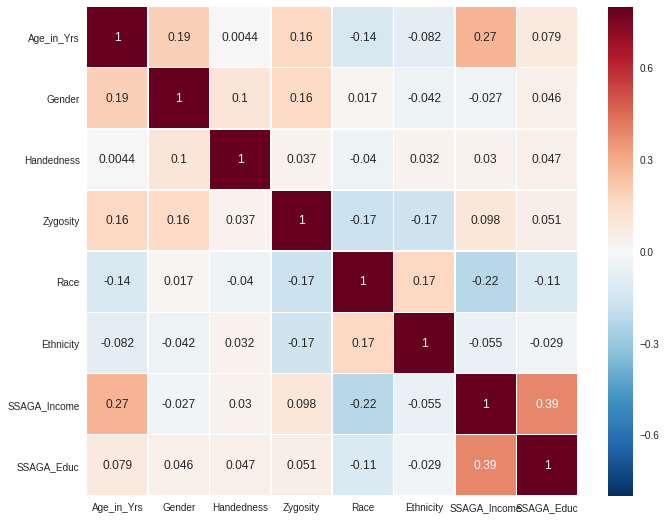

In [9]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data_demog.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8)

### The most correlated Demog data

- #### Income and Years of Education

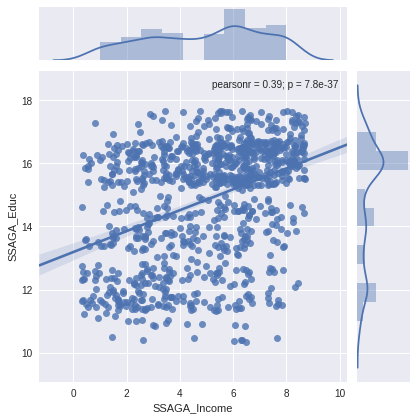

In [10]:
sns.set(color_codes=True)
sns.jointplot(x="SSAGA_Income", y="SSAGA_Educ", x_jitter=.7,y_jitter=.7,data=data_demog,kind="reg");

- ####  Income and Age

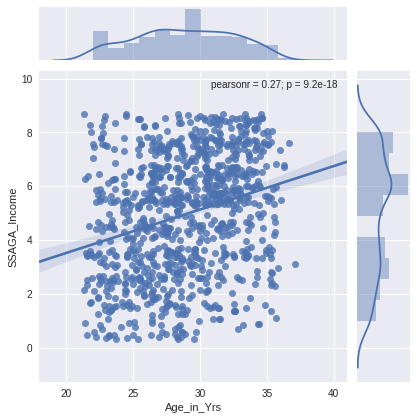

In [11]:
sns.set(color_codes=True)
sns.jointplot(x="Age_in_Yrs", y="SSAGA_Income", data=data_demog, x_jitter=.7,y_jitter=.7,kind='reg');

#### Gender differences 
- **Incomes**

Total household income: 
- <$10,000 = 1
- 10K-19,999 = 2
- 20K-29,999 = 3
- 30K-39,999 = 4
- 40K-49,999 = 5
- 50K-74,999 = 6
- 75K-99,999 = 7
- 100,000 and more = 8

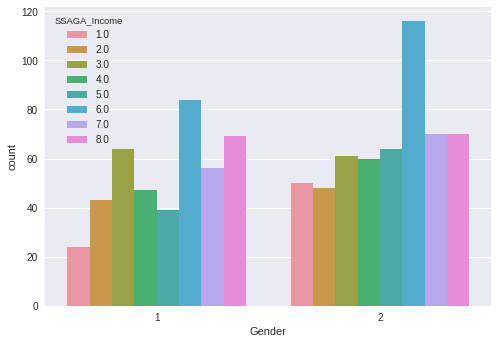

In [12]:
#'Male':1,'Female':2
sns.countplot(x='Gender',hue='SSAGA_Income',data=data_demog)

- **Education**

Years of education completed: <11 = 11; 12; 13; 14; 15; 16; 17+ = 17

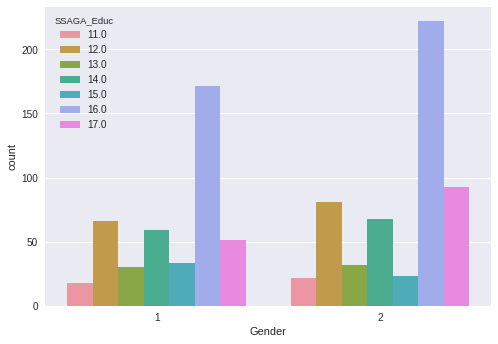

In [13]:
# Gender diference - Education

sns.countplot(x='Gender',hue='SSAGA_Educ',data=data_demog)

# Physiologic Domaine

BMI: Body Mass Index

BPSystolic: Blood Pressure - Systolic

BPDiastolic: Blood Pressure - Diastolic

PSQI_Score: Sleep (Pittsburgh Sleep Questionnaire) 

In [14]:
behav_physio = ["BMI","BPSystolic","BPDiastolic","PSQI_Score"]
data_physio = data.get(behav_physio)
data_physio.head()

,BMI,BPSystolic,BPDiastolic,PSQI_Score
0,25.49,135.0,77.0,8
1,26.64,119.0,71.0,6
2,22.96,117.0,70.0,3
3,27.75,152.0,94.0,5
4,36.91,141.0,75.0,5


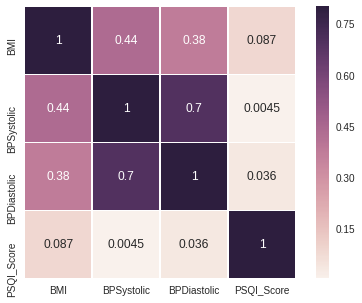

In [15]:
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data_physio.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

### The most correlated Physiodata

**- Systolic and Diastolic Blood Pressure**

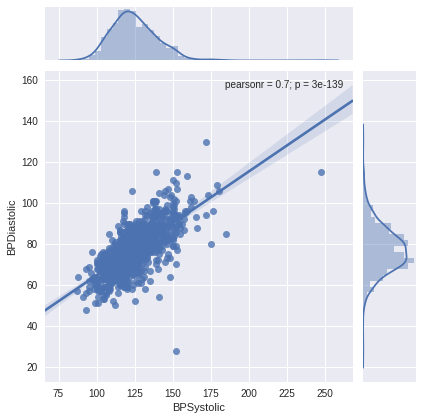

In [16]:
sns.set(color_codes=True)
sns.jointplot(x="BPSystolic", y="BPDiastolic",data=data_physio,kind="reg");

**- BMI and Systolic Blood Pressure**

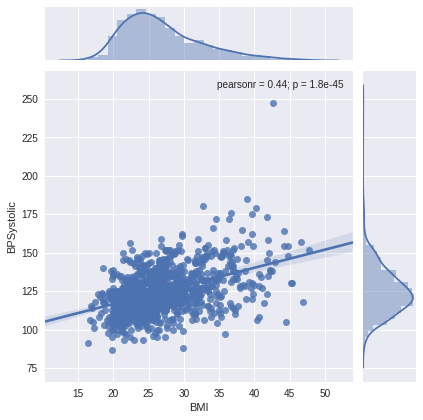

In [17]:
sns.set(color_codes=True)
sns.jointplot(x="BMI", y="BPSystolic",data=data_physio,kind="reg");

# Cognitive Domain

- ### Instrument: Episodic Memory (Picture Sequence Memory)


*The Picture Sequence Memory Test is a measure developed for the Open of episodic memory for ages 3-85 years. It involves recalling increasingly lengthy series of illustrated objects and activities that are presented in a particular order on the computer screen. The participants are asked to recall the sequence of pictures that is demonstrated over two learning trials; sequence length varies from 6-18 pictures, depending on age. Participants are given credit for each adjacent pair of pictures (i.e., if pictures in locations 7 and 8 and placed in that order and adjacent to each other anywhere - such as slots 1 and 2 - one point is awarded) they correctly place, up to the maximum value for the sequence, which is one less than the sequence length (if there are 18 pictures in the sequence, the maximum score is 17, because that is the number of adjacent pairs of pictures that exist). The test takes approximately 7 minutes to administer. This test is recommended for ages 3-85.*

In [44]:
behav_cog_EpMem = ["PicSeq_Unadj"]
data_cog_EpMem = data.get(behav_cog_EpMem)
data_cog_EpMem.count()

PicSeq_Unadj    969
dtype: int64

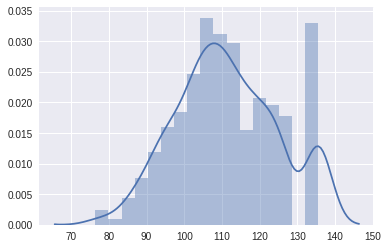

In [41]:
# Plot distribution
sns.distplot(data_cog_EpMem.loc[~data_cog_EpMem.PicSeq_Unadj.isnull()].PicSeq_Unadj.as_matrix());

- ### Instrument: Executive Function

   - #### Cognitive Flexibility (Dimensional Change Card Sort)
   
   *DCCS is a measure of cognitive flexibility. Two target pictures are presented that vary along two dimensions (e.g., shape and color). Participants are asked to match a series of bivalent test pictures (e.g., yellow balls and blue trucks) to the target pictures, first according to one dimension (e.g., color) and then, after a number of trials, according to the other dimension (e.g., shape). "Switch" trials are also employed, in which the participant must change the dimension being matched. For example, after 4 straight trials matching on shape, the participant may be asked to match on color on the next trial and then go back to shape, thus requiring the cognitive flexibility to quickly choose the correct stimulus. Scoring is based on a combination of accuracy and reaction time, and the test takes approximately 4 minutes to administer. This test is recommended for ages 3-85.*
   
   - #### Inhibition (Flanker Task)
   *The Flanker task measures both a participant's attention and inhibitory control. The test requires the participant to focus on a given stimulus while inhibiting attention to stimuli (fish for ages 3-7 or arrows for ages 8-85) flanking it. Sometimes the middle stimulus is pointing in the same direction as the "flankers" (congruent) and sometimes in the opposite direction (incongruent). Scoring is based on a combination of accuracy and reaction time, and the test takes approximately 3 minutes to administer. This test is recommended for ages 3-85.*

In [27]:
behav_cog_ExFun = ["PicSeq_Unadj","Flanker_Unadj"]
data_cog_ExFun = data.get(behav_cog_ExFun)
data_cog_ExFun.count()

PicSeq_Unadj     969
Flanker_Unadj    970
dtype: int64

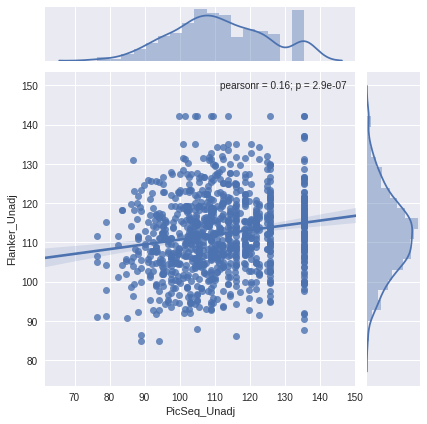

In [34]:
sns.jointplot(x="PicSeq_Unadj", y="Flanker_Unadj",data=data_cog_ExFun.dropna(),kind="reg");

- ### Instrument: Fluid Intelligence (Penn Progressive Matrices)

    *Fluid intelligence is measured using Raven’s Progressive Matrices (Prabhakaran et al. 1997; Christoff et al. 2001; Gray et al. 2003; Conway et al. 2005; Gray et al. 2005; Wendelken et al. 2008). We use Form A of an abbreviated version of the Raven’s developed by Gur and colleagues (Bilker et al. 2012). Participants are presented with patterns made up of 2x2, 3x3 or 1x5 arrangements of squares, with one of the squares missing. The participant must pick one of five response choices that best fits the missing square on the pattern. The task has 24 items and 3 bonus items, arranged in order of increasing difficulty. However, the task discontinues if the participant makes 5 incorrect responses in a row.
    *
    
    ```
    Number of Correct Responses (PMAT24_A_CR)
    Median Reaction Time for Correct Responses (PMAT24_A_RTCR)```

In [30]:
behav_cog_FluInt = ["PMAT24_A_CR","PMAT24_A_RTCR"]
data_cog_FluInt = data.get(behav_cog_FluInt)
data_cog_FluInt.count()

PMAT24_A_CR      964
PMAT24_A_RTCR    964
dtype: int64

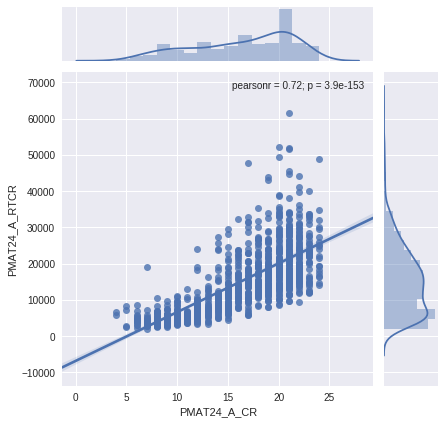

In [35]:
sns.jointplot(x="PMAT24_A_CR", y="PMAT24_A_RTCR",data=data_cog_FluInt.dropna(),kind="reg");

- ### Instrument: Language

  - #### Reading Decoding (Oral Reading Recognition)

    *Separate but parallel reading tests have been developed in English and in Spanish. In either language, the participant is asked to read and pronounce letters and words as accurately as possible. The test administrator scores them as right or wrong. For the youngest children, the initial items require them to identify letters (as opposed to symbols) and to identify a specific letter in an array of 4 symbols. The test is given via a computerized adaptive format and requires approximately 3 minutes. This test is recommended for ages 7-85, but is available for use as young as age 3, if requested.*
  
  - #### Vocabulary Comprehension (Picture Vocabulary)
   
   *This measure of receptive vocabulary is administered in a computerized adaptive format. The respondent is presented with an audio recording of a word and four photographic images on the computer screen and is asked to select the picture that most closely matches the meaning of the word. This test takes approximately 4 minutes to administer and is recommended for ages 3-85.*

In [62]:
behav_cog_Lang = ["ReadEng_Unadj","PicVocab_Unadj"]
data_cog_Lang= data.get(behav_cog_Lang)
data_cog_Lang.count()

ReadEng_Unadj     970
PicVocab_Unadj    970
dtype: int64

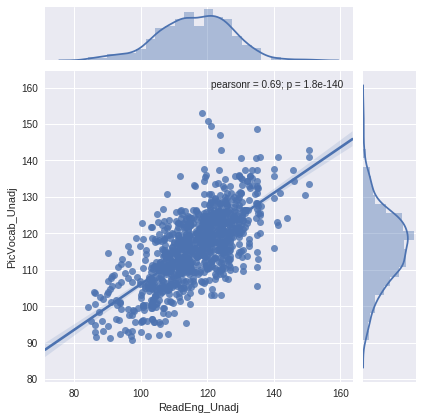

In [65]:
# Plot distribution
sns.jointplot(x="ReadEng_Unadj", y="PicVocab_Unadj",data=data_cog_Lang.dropna(),kind="reg");

- ### Instrument: Processing Speed (Pattern Completion Processing Speed)
    
    *This test measures speed of processing by asking participants to discern whether two side-by-side pictures are the same or not. Participants' raw score is the number of items correct in a 90-second period. The items are designed to be simple to most purely measure processing speed. The test overall takes approximately 3 minutes to administer. This test is recommended for ages 7-85, but is available for use as young as age 3, if requested.*

In [69]:
behav_cog_ProcSpee = ["ProcSpeed_Unadj"]
data_cog_ProcSpee= data.get(behav_cog_ProcSpee)
data_cog_ProcSpee.count()

ProcSpeed_Unadj    970
dtype: int64

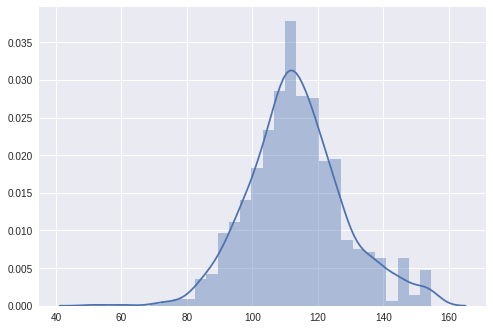

In [70]:
# Plot distribution
sns.distplot(data_cog_ProcSpee.ProcSpeed_Unadj.as_matrix());

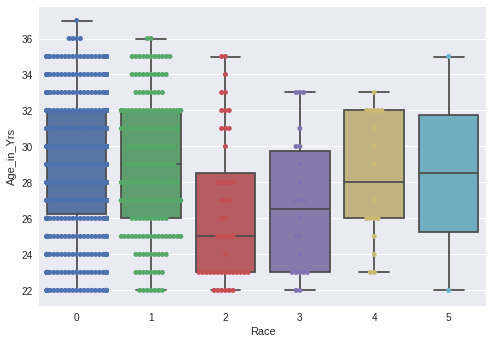

In [60]:
f = plt.figure()
ax = f.add_subplot(111)
sns.swarmplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)
sns.boxplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


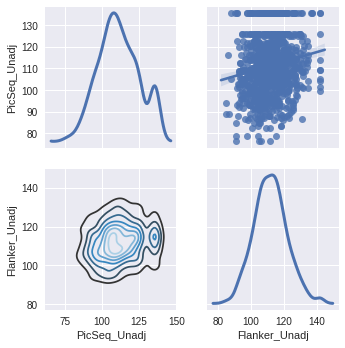

In [24]:
g = sns.PairGrid(data_cog_ExFun.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)